## Student Performance Indicator

### Life Cycle of Machine Learning Project

- Understand the Problem Statement
- Data Collection
- Data Checks to Perform
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- Choose Best Model




### 1. Problem Statement

- This project is to understand how student's performance (test score) is affected by other variables such as Gender, Ethnicity, Parental level of Education, Lunch and Test Preparation course.

### 2. Data Collection

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The dataset contains 8 columns and 1000 rows

#### 2.1 Import Data and  Requicrimson Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')

#### Read the data

In [2]:
df = pd.read_csv('stud.csv')

#### Show top 5 records

In [3]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset Information

- gender: sex of the students --> Male/Female
- race/ethnicity: ethnicity of the students --> Group A, B, C, D & E
- parental level of Education: Parents' final Education
- lunch: having lunch before test (standard or free meal)
- test preparation course: complete or not complete before test
- math score
- reading score
- writing score


### 3. Data Checks to Perform

- Check missing values
- check duplicated values
- check data type
- check the number of unique value of each column
- check statistics of the dataset
- check various categories present in the different categorical columns

#### 3.1 Check Missing Values

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### **Observation:** 
* There is no missing values in the dataset

#### 3.2 Check Duplicated Values

In [6]:
df.duplicated().sum()

np.int64(0)

##### **Observation:** 
* There is no duplicate values in the dataset

#### 3.3 Check Data Type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### **Observation:** 
- gender, race_ethnicity, parental_level_of_education, lunch, test_preparation_course are of *object* datatype
- math_score, reading_score, writing score are of *int (numeric)* datatype

#### 3.4 Check Unique Values Each Columns

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Check Statistics of Data

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### 4. Exploring Data

####  Getting What Unique Value Present

In [10]:
print("Categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of Education' variable: ", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ", end=" ")
print(df['test_preparation_course'].unique())




Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of Education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


#### Numerical & Categorical Features

In [11]:
## Define Numerical and Categorical Features

numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']

print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


**Observation**
- We have 3 numerical features i.e. ['math_score', 'reading_score', 'writing_score']
- We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

#### "Total Score" & "Average Score"

In [12]:
df['total_score'] = df['math_score'] + df['reading_score']+ df['writing_score']
df['average_score'] = df['total_score']/3

In [13]:
reading_full = df[df['reading_score']==100]['average_score'].count()
writing_full = df[df['writing_score']==100]['average_score'].count()
math_full = df[df['math_score']==100]['average_score'].count()

print(f'Number of Students with full marks in Reading: {reading_full}')
print(f'Number of Students with full marks in Writing: {writing_full}')
print(f'Number of Students with full marks in Math: {math_full}')

Number of Students with full marks in Reading: 17
Number of Students with full marks in Writing: 14
Number of Students with full marks in Math: 7


**Observations**
- Student Secucrimson full Marks Better in Reading
- Students secucrimson least full marks in Maths

In [14]:
reading_less_20= df[df['reading_score']<=20]['average_score'].count()
writing_less_20 = df[df['writing_score']<=20]['average_score'].count()
math_less_20 = df[df['math_score']<=20]['average_score'].count()

print(f'Number of Students with less than 20 marks in Reading: {reading_less_20}')
print(f'Number of Students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of Students with less than 20 marks in Math: {math_less_20}')

Number of Students with less than 20 marks in Reading: 1
Number of Students with less than 20 marks in Writing: 3
Number of Students with less than 20 marks in Math: 4


**Observations**
- Students performed least in maths
- Students performed best in reading

#### Visualize Categories Count

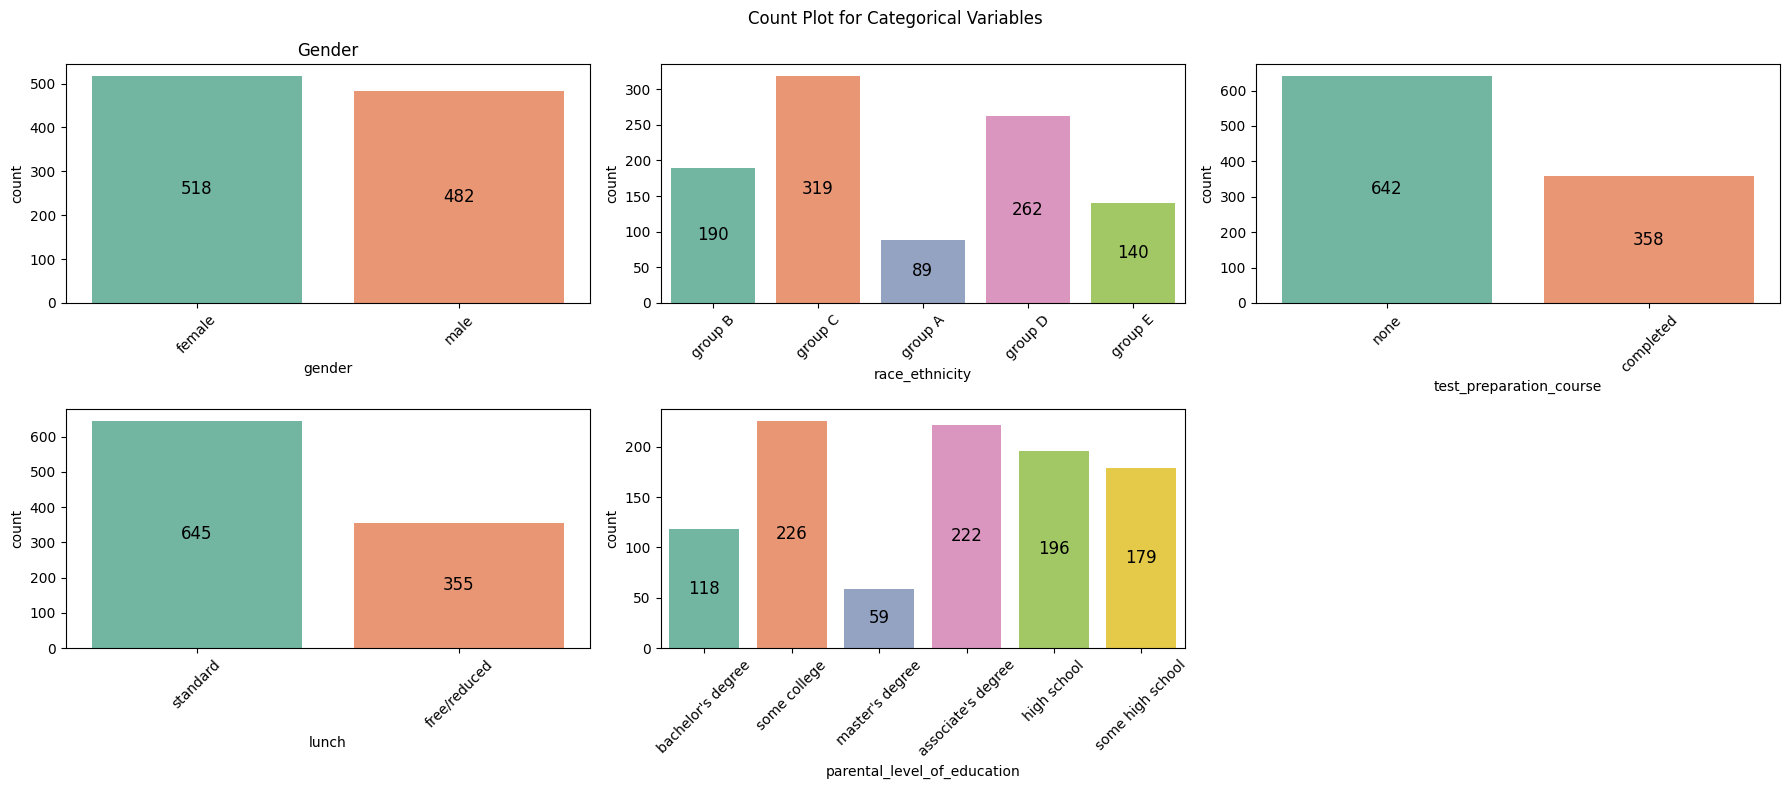

In [15]:
fig, axes = plt.subplots(2,3,figsize=(18,8))
fig.suptitle('Count Plot for Categorical Variables')
sns.countplot(data=df, x='gender', ax=axes[0][0],palette='Set2')
axes[0][0].set_title('Gender')

sns.countplot(data=df, x='race_ethnicity', ax=axes[0][1],palette='Set2')
sns.countplot(data=df, x='test_preparation_course', ax=axes[0][2],palette='Set2')
sns.countplot(data=df, x='lunch', ax=axes[1][0],palette='Set2')

sns.countplot(data=df, x='parental_level_of_education', ax=axes[1][1],palette='Set2')


axes[1][2].axis('off')

for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)

for ax in axes.flat:
    if ax.has_data():
        for container in ax.containers:
            ax.bar_label(container, fontsize=12, label_type='center')

plt.tight_layout()
plt.show()

#['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

#### Visualize `average_score` distribution

- **Histogram & KDE Plots ** 

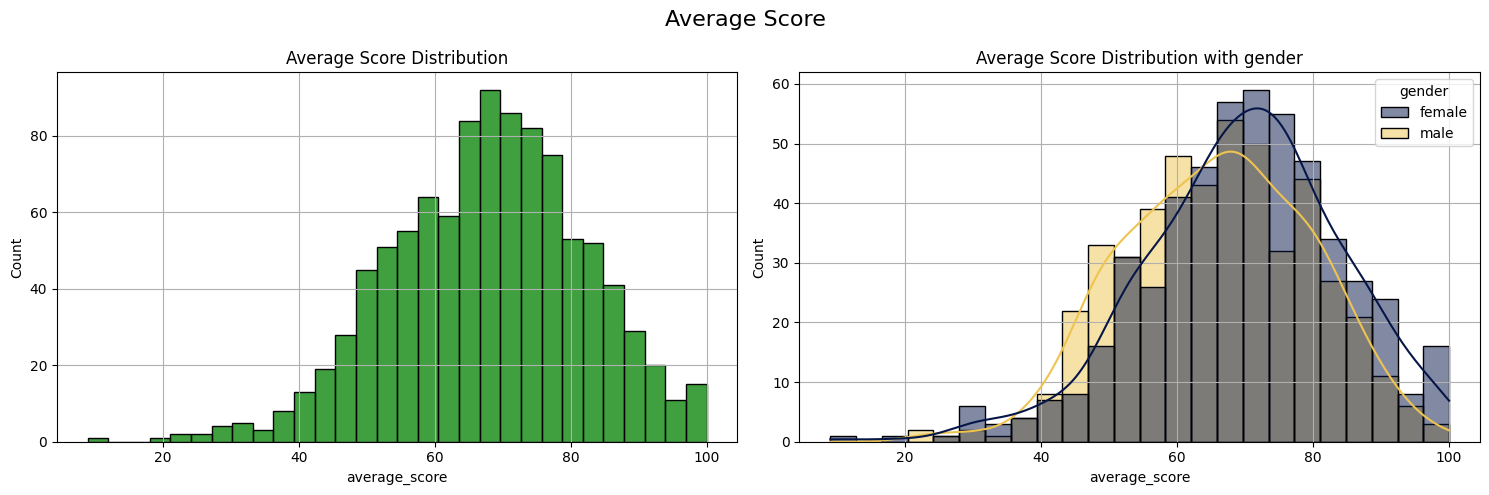

In [16]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Average Score', fontsize=16)
sns.histplot(data=df, x='average_score', bins=30, ax = axes[0] , color='g', label='Histogram')
axes[0].set_title('Average Score Distribution')
axes[0].grid(True)

sns.histplot(data=df, x='average_score', ax = axes[1] ,hue='gender', kde=True, palette= ["#061649DA","#EEC450D8"])
axes[1].set_title('Average Score Distribution with gender')
axes[1].grid(True)

plt.tight_layout()
plt.show()

**Obsrvations**
- Female Students Show Better Average Score compacrimson to Male Students

#### Vislualize `total_score` Distribution

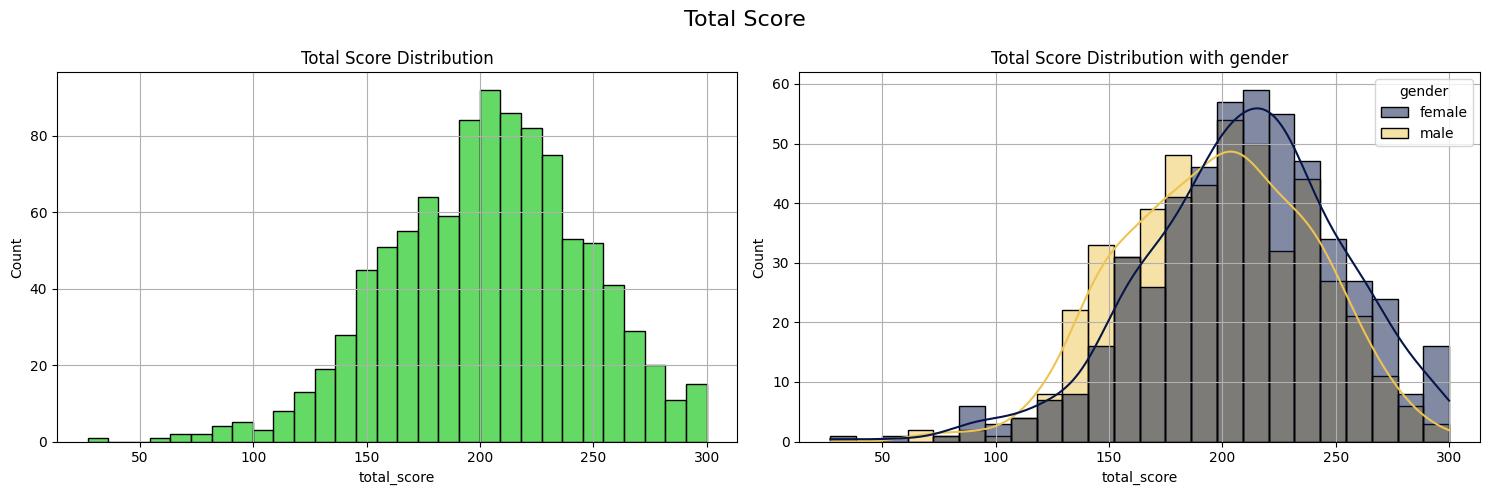

In [17]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Total Score', fontsize=16)
sns.histplot(data=df, x='total_score', bins=30, ax = axes[0] , color='limegreen', label='Histogram')
axes[0].set_title('Total Score Distribution')
axes[0].grid(True)

sns.histplot(data=df, x='total_score', ax = axes[1] ,hue='gender', kde=True, palette= ["#061649DA","#EEC450D8"])
axes[1].set_title('Total Score Distribution with gender')
axes[1].grid(True)

plt.tight_layout()
plt.show()

**Observation**
- Female performing well based on Total Score as well

#### Visualize Performace with `lunch`

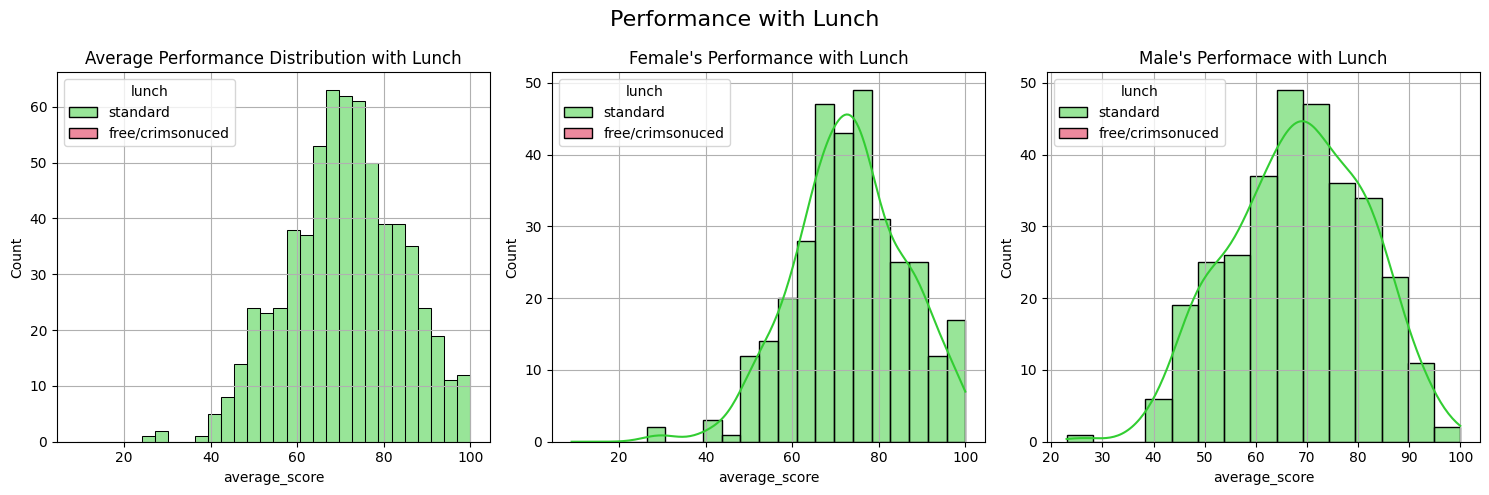

In [18]:
lunch_order = ['standard', 'free/crimsonuced'] 
lunch_palette = {
    'standard': 'limegreen', 'free/crimsonuced':'crimson'
}

fig, axes = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Performance with Lunch', fontsize=16)
sns.histplot(data=df, x='average_score', bins=30, ax = axes[0] , palette=lunch_palette, label='Histogram', hue='lunch', hue_order=lunch_order)
axes[0].set_title('Average Performance Distribution with Lunch')
axes[0].grid(True)

sns.histplot(data=df[df['gender']=='female'], x='average_score', ax = axes[1] ,hue='lunch', kde=True,hue_order=lunch_order, palette=lunch_palette)
axes[1].set_title("Female's Performance with Lunch")
axes[1].grid(True)

sns.histplot(data=df[df['gender']=='male'], x='average_score', ax = axes[2] ,hue='lunch', kde=True,hue_order=lunch_order, palette=lunch_palette)
axes[2].set_title("Male's Performace with Lunch")
axes[2].grid(True)

plt.tight_layout()
plt.show()

**Observation**
- Standard lunch helps in performing better.
- Irrespective of gender, Standard lunch improves performance.

#### Visualize Performnace with `parent_level_of_education`

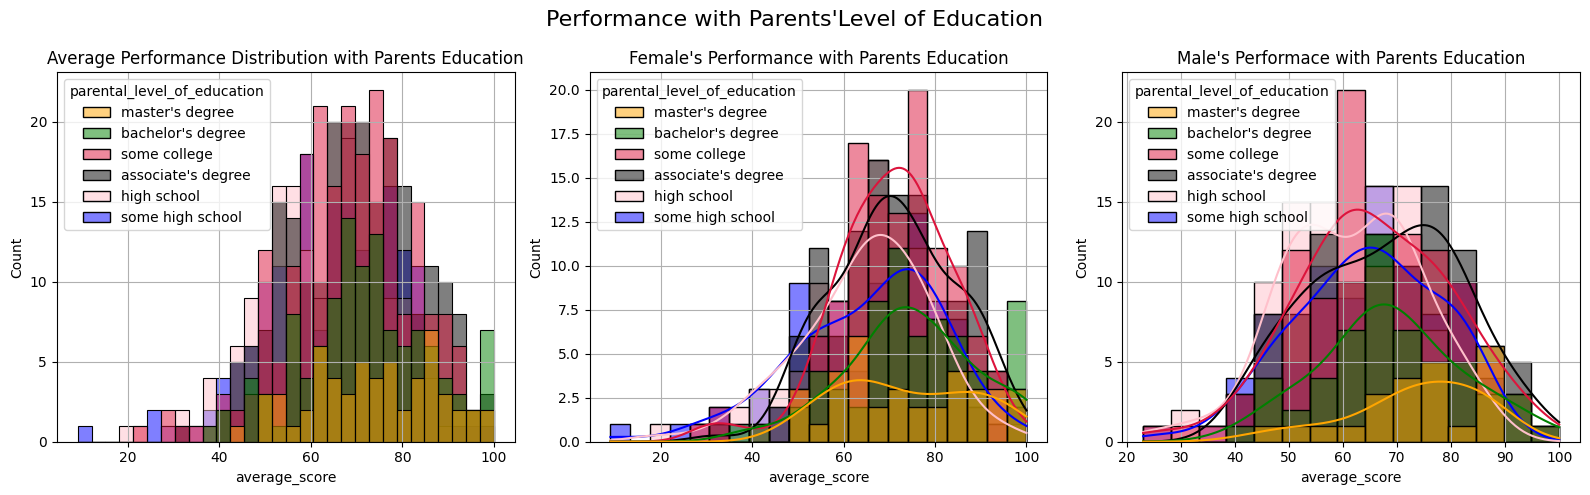

In [19]:
parent_education_order = ["master's degree", "bachelor's degree", 'some college', "associate's degree", 'high school', 'some high school'] 
parent_education_color = {   "master's degree":'orange',
                           "bachelor's degree":'green', 
                           'some college':'crimson', 
                           "associate's degree":'black', 
                           'high school':'pink', 
                           'some high school':'blue'
}

fig, axes = plt.subplots(1,3, figsize=(16,5))
fig.suptitle("Performance with Parents'Level of Education", fontsize=16)
sns.histplot(data=df, x='average_score', bins=30, ax = axes[0] , palette=parent_education_color, label='Histogram', hue='parental_level_of_education', hue_order=parent_education_order)
axes[0].set_title('Average Performance Distribution with Parents Education')
axes[0].grid(True)

sns.histplot(data=df[df['gender']=='female'], x='average_score', ax = axes[1] ,hue='parental_level_of_education', kde=True,hue_order=parent_education_order, palette=parent_education_color)
axes[1].set_title("Female's Performance with Parents Education")
axes[1].grid(True)

sns.histplot(data=df[df['gender']=='male'], x='average_score', ax = axes[2] ,hue='parental_level_of_education', kde=True,hue_order=parent_education_order, palette=parent_education_color)
axes[2].set_title("Male's Performace with Parents Education")
axes[2].grid(True)

plt.tight_layout()
plt.show()

**Observation**
- Parents' Education has no impact on Female Students' Performance
- Male Students : Parent with Master or aassociate degree tends to perform better

#### Visualize Performace with `race_ethnicity`

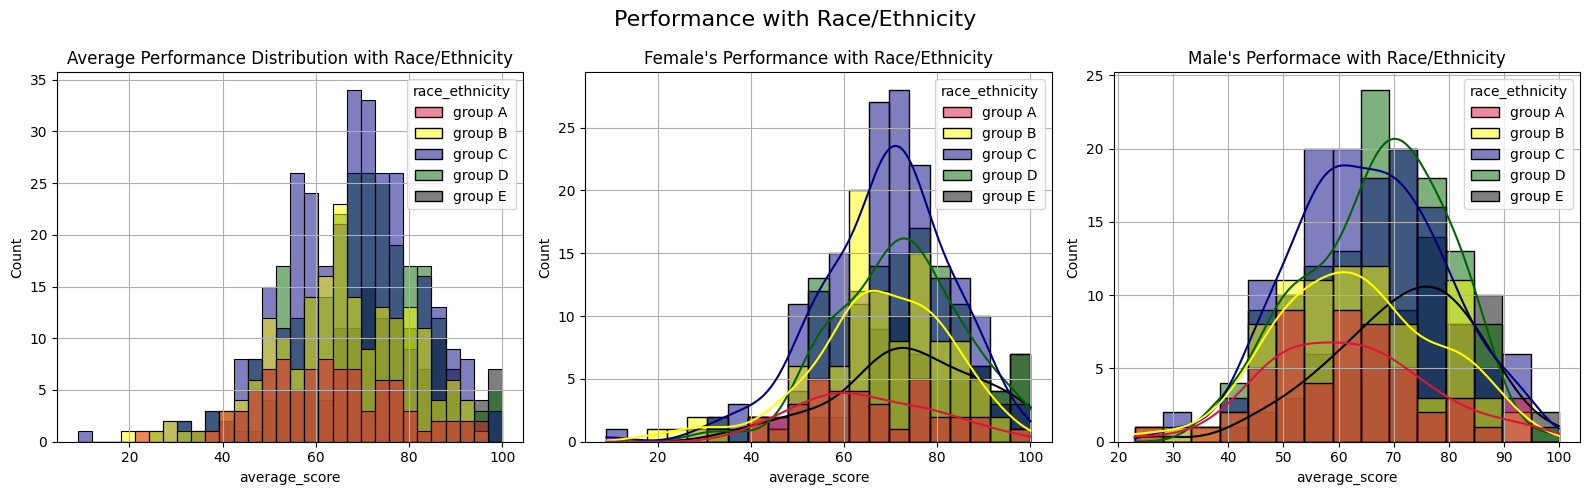

In [20]:
race_order = ['group A','group B','group C','group D','group E']
race_color = {
    'group A':'crimson',
    'group B':'yellow',
    'group C':'navy',
    'group D':'darkgreen',
    'group E':'black'
}

fig, axes = plt.subplots(1,3, figsize=(16,5))
fig.suptitle("Performance with Race/Ethnicity", fontsize=16)
sns.histplot(data=df, x='average_score', bins=30, ax = axes[0] , palette=race_color, label='Histogram', hue='race_ethnicity', hue_order=race_order)
axes[0].set_title('Average Performance Distribution with Race/Ethnicity')
axes[0].grid(True)

sns.histplot(data=df[df['gender']=='female'], x='average_score', ax = axes[1] ,hue='race_ethnicity', kde=True,hue_order=race_order, palette=race_color)
axes[1].set_title("Female's Performance with Race/Ethnicity")
axes[1].grid(True)

sns.histplot(data=df[df['gender']=='male'], x='average_score', ax = axes[2] ,hue='race_ethnicity', kde=True,hue_order=race_order, palette=race_color)
axes[2].set_title("Male's Performace with Race/Ethnicity")
axes[2].grid(True)

plt.tight_layout()
plt.show()

**Observation**
- group A & group B student performs poor in comparison to other groups
- group A & group B student performs poor irrespective 

#### Visualize Maximum Marks with Violin Plot

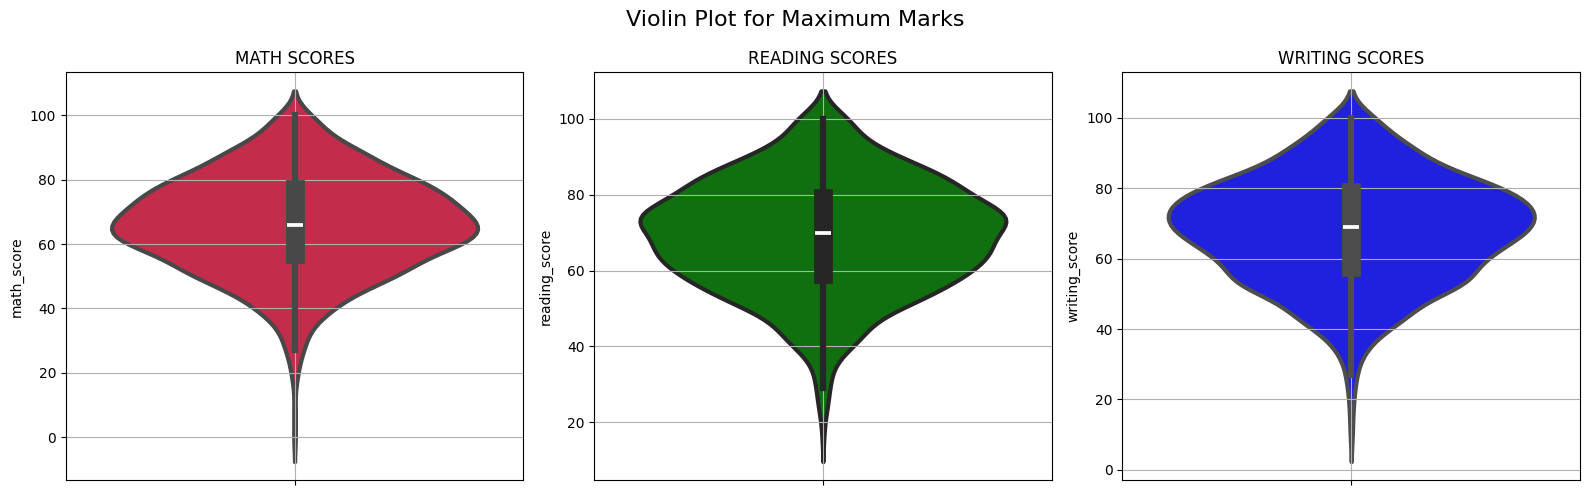

In [21]:
fig, axes = plt.subplots(1,3, figsize=(16,5))
fig.suptitle('Violin Plot for Maximum Marks', fontsize=16)
axes[0].set_title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='crimson', ax=axes[0],linewidth=3)
axes[0].grid(True)
axes[1].set_title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3, ax=axes[1])
axes[1].grid(True)
axes[2].set_title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3, ax=axes[2])
axes[2].grid(True)

plt.tight_layout()
plt.show()

**Observation**
- Most student scocrimson between 60-80 in maths & in reading and writing najority scocrimson between 50-80


#### Multivariate Analysis Using Pie-Chart

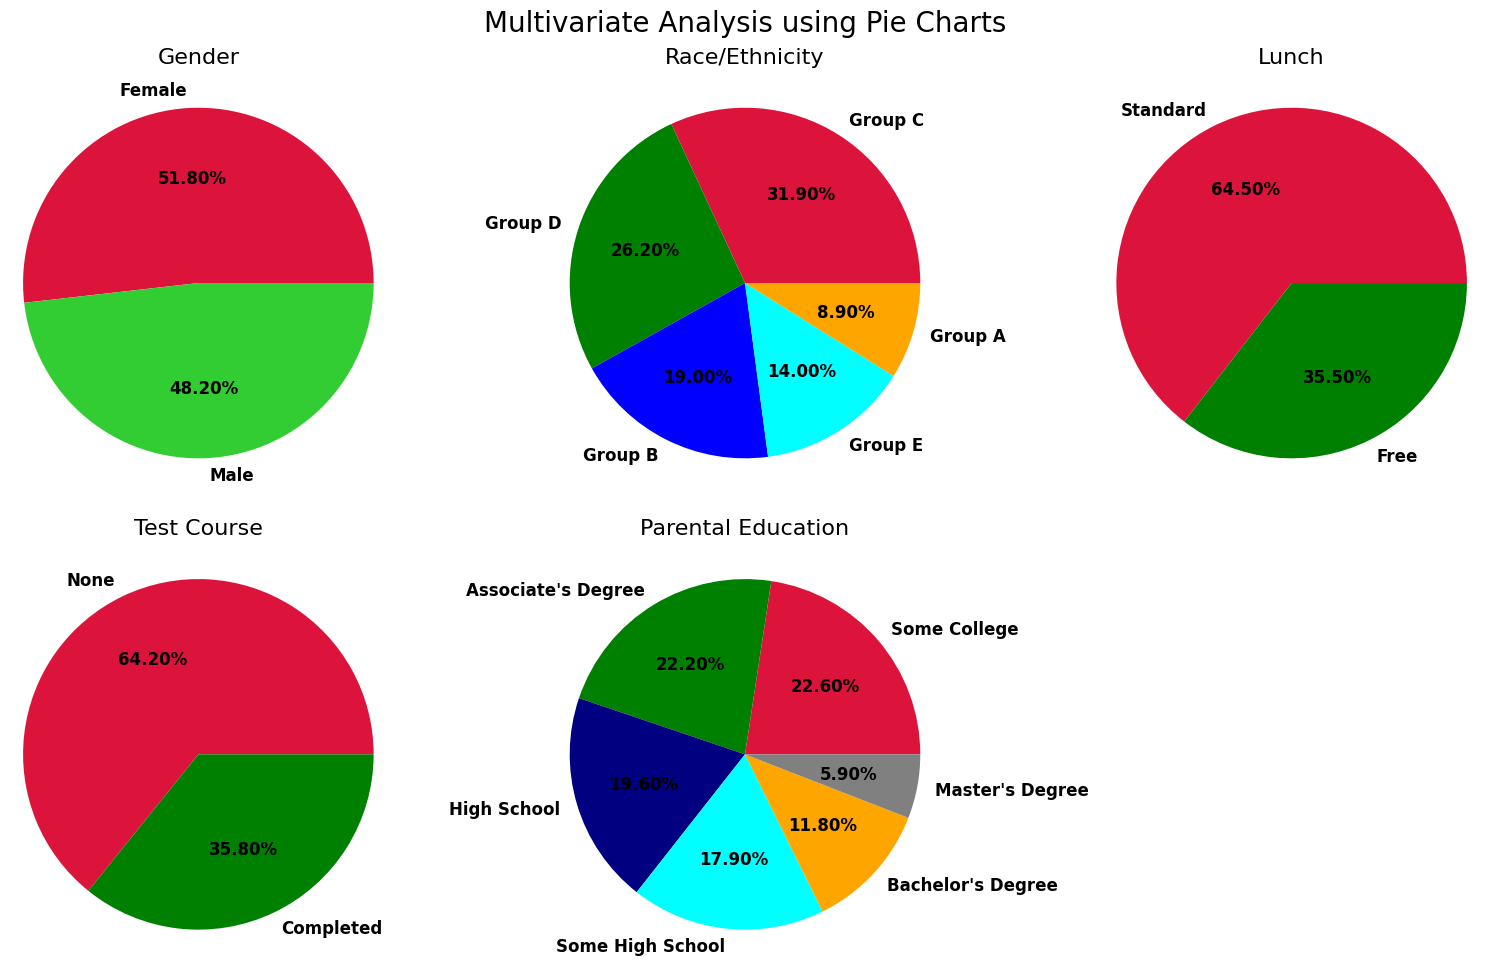

In [22]:
fig, axes = plt.subplots(2,3,figsize=(15,10))
fig.suptitle('Multivariate Analysis using Pie Charts',fontsize=20)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['crimson','limegreen']
axes[0][0].pie(size, colors = color, labels = labels,autopct=lambda p: f'{p:.2f}%', textprops={'fontsize': 12, 'weight': 'bold'})
axes[0][0].set_title('Gender', fontsize = 16)
axes[0][0].axis('equal')

size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['crimson', 'green', 'blue', 'cyan','orange']

axes[0][1].pie(size, colors = color,labels = labels,autopct=lambda p: f'{p:.2f}%', textprops={'fontsize': 12, 'weight': 'bold'})
axes[0][1].set_title('Race/Ethnicity', fontsize = 16)
axes[0][1].axis('equal')

size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['crimson','green']
axes[0][2].pie(size, colors = color,labels = labels,autopct=lambda p: f'{p:.2f}%', textprops={'fontsize': 12, 'weight': 'bold'})
axes[0][2].set_title('Lunch', fontsize = 16)
axes[0][2].axis('equal')


size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['crimson','green']
axes[1][0].pie(size, colors = color,labels = labels,autopct=lambda p: f'{p:.2f}%', textprops={'fontsize': 12, 'weight': 'bold'})
axes[1][0].set_title('Test Course', fontsize = 16)
axes[1][0].axis('equal')



size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['crimson', 'green', 'navy', 'cyan','orange','grey']
axes[1][1].pie(size, colors = color,labels = labels,autopct=lambda p: f'{p:.2f}%', textprops={'fontsize': 12, 'weight': 'bold'})
axes[1][1].set_title('Parental Education', fontsize = 16)
axes[1][1].axis('equal')

axes[1][2].axis('off')


plt.tight_layout()
plt.show()

**Observations**
- Number of `Male` and `Female` Students are almost equal.
- Students with ethnicity of `Group C` are most in number
- Studnets with `Standard` lunch are greater in number.
- Students taken `None` test preparation course are more than those who completed it.
- Number of students whose parental education is `Some College` is greater followed closely by `Associate's Degree`